In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

First we read the data set

In [2]:
df = pd.read_csv('data/mushroom.csv')
df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


Looking at the data we can see that all categories are surrounded by the string "b''" so for clarity reasons we descided to remove this.

In [3]:
for col in df.columns:
    df[col] = df[col].str[1:]
df = df.replace({"'":""}, regex=True)
df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


Now looking at the data we can see that all the data we have is categorical

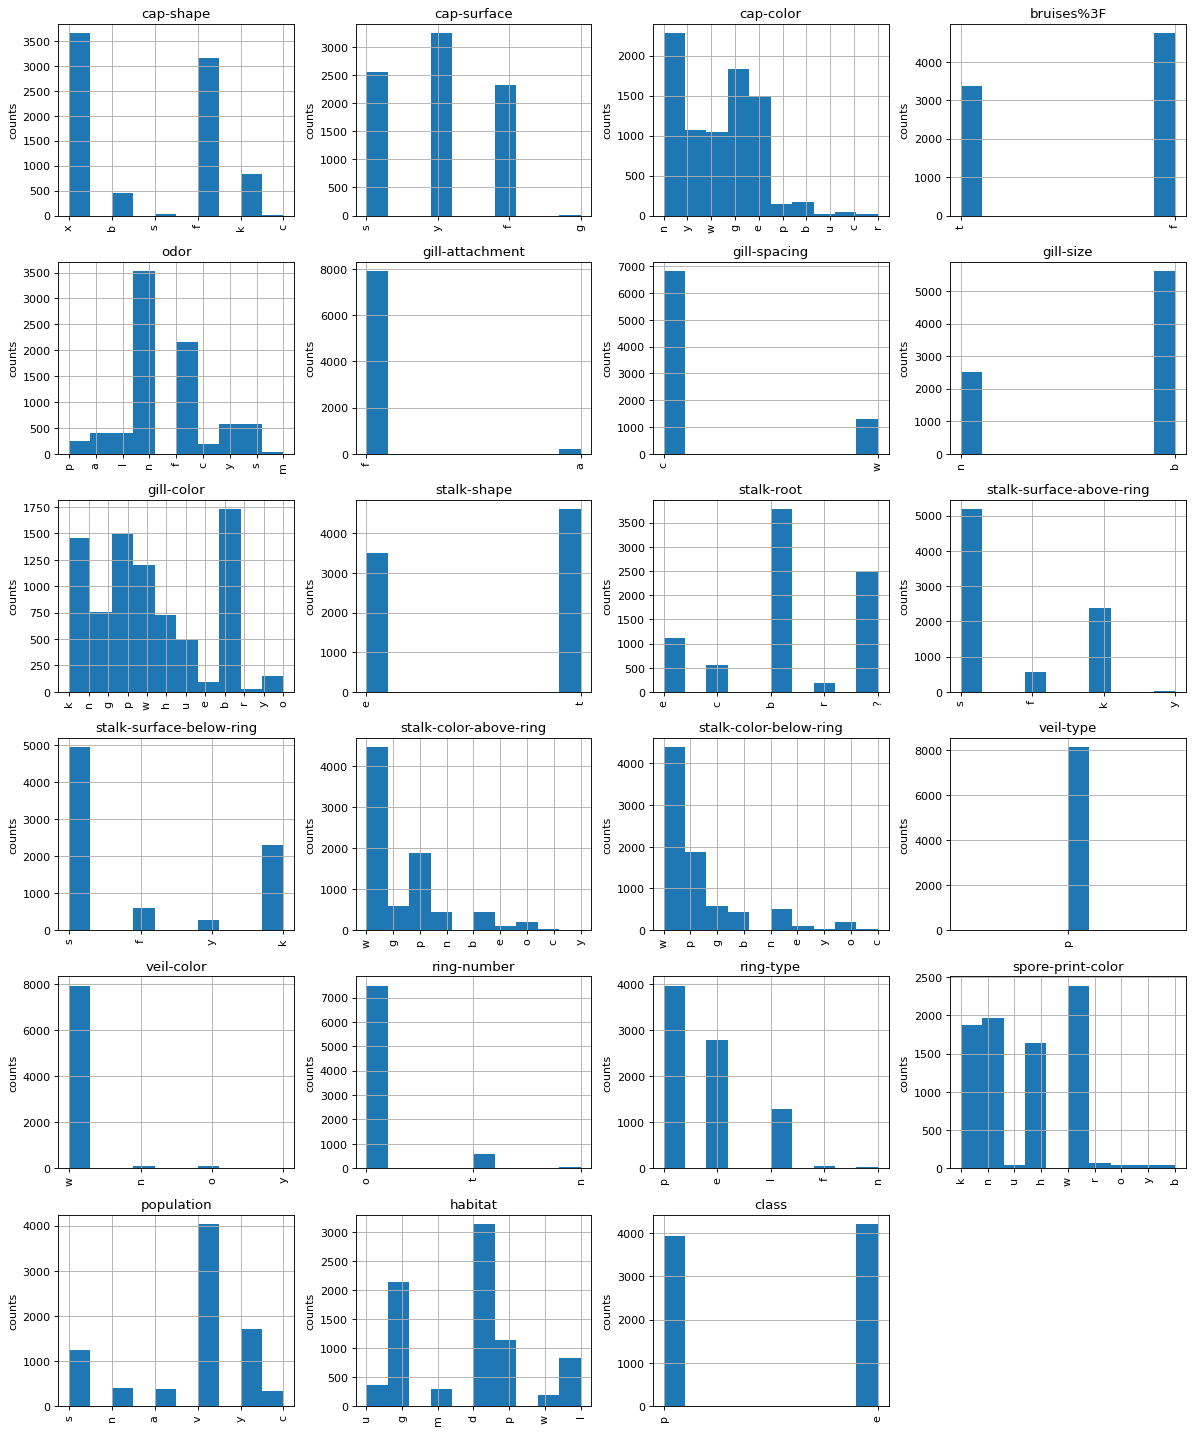

In [4]:
def show_distribution(dataframe):
  columnNames = list(dataframe)

  n = len(columnNames)

  row_count = 4

  plt.figure(figsize = (15, (n//row_count+1)*3), dpi = 80)
  for i in range(n):
      plt.subplot(n//row_count+1, row_count, i + 1)
      columnDf = dataframe.iloc[:, i]
      columnDf.hist()
      plt.ylabel('counts')
      plt.xticks(rotation = 90)
      plt.title(f'{columnNames[i]}')
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
  plt.show()

show_distribution(df)

Looking at the distribution of the data it seems that some data points have an unequal representation in the data. Luckily the class we are trying to predict has a almost 50/50 split in positive/negative distribution.

In [5]:
def ohe(dataframe, cat_cols, cat_dictionary):
    df = dataframe.copy()
    for col in cat_cols:
        # Check if column is in the category dictionary
        
        # Get the list of categories for the column
        categories = cat_dictionary[col]
        
        # Create new column names for each category
        new_cols = [f"{col}_{c}" for c in categories]
        
        # One-hot encode the column
        one_hot = pd.get_dummies(df[col], prefix=col)
        
        # Add columns for any missing categories
        for c in new_cols:
            if c not in one_hot.columns:
                one_hot[c] = 0
        
        # Add the one-hot encoded columns to the dataframe
        df = pd.concat([df, one_hot], axis=1)
        
        # Drop the original column from the dataframe
        df.drop(columns=[col], inplace=True)
    
    return df



In [6]:
df_dict = df.to_dict(orient = 'list')
for key in df_dict.keys():
    df_dict[key] = list(set(df_dict[key]))

In [7]:
df_ohe = ohe(df, df.columns, df_dict)

In [8]:
df_ohe = df_ohe.drop("class_e", axis=1)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class_p
cap-shape_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,...,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764,-0.182567
cap-shape_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,...,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,0.023007
cap-shape_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,...,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450,0.018526
cap-shape_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,...,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003,0.163565
cap-shape_s,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,-0.051272,...,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784,-0.060664
cap-shape_x,-0.219564,-0.020077,-0.720235,-0.304733,-0.056884,1.000000,0.063511,-0.020077,-0.040634,-0.019137,...,-0.060421,0.044626,0.071773,0.023197,-0.096639,-0.004529,-0.029042,0.002845,-0.036493,-0.026886
cap-surface_f,-0.091638,-0.014032,0.064801,-0.158942,0.099464,0.063511,1.000000,-0.014032,-0.428362,-0.515479,...,-0.116485,0.210552,0.190756,0.080694,-0.191987,-0.122077,-0.086727,-0.011913,-0.098365,-0.195415
cap-surface_g,0.018820,0.249631,-0.006285,0.010863,-0.001396,-0.020077,-0.014032,1.000000,-0.015038,-0.018096,...,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,0.023007
cap-surface_s,0.117712,-0.015038,-0.093397,0.137988,-0.042607,-0.040634,-0.428362,-0.015038,1.000000,-0.552410,...,0.019574,-0.339696,-0.301670,0.123932,0.190799,0.077081,-0.039574,0.117548,0.062109,0.095454
cap-surface_y,-0.027947,0.015893,0.029076,0.015261,-0.051272,-0.019137,-0.515479,-0.018096,-0.552410,1.000000,...,0.089870,0.128418,0.110902,-0.191326,-0.006819,0.039697,0.117915,-0.100248,0.031986,0.088677


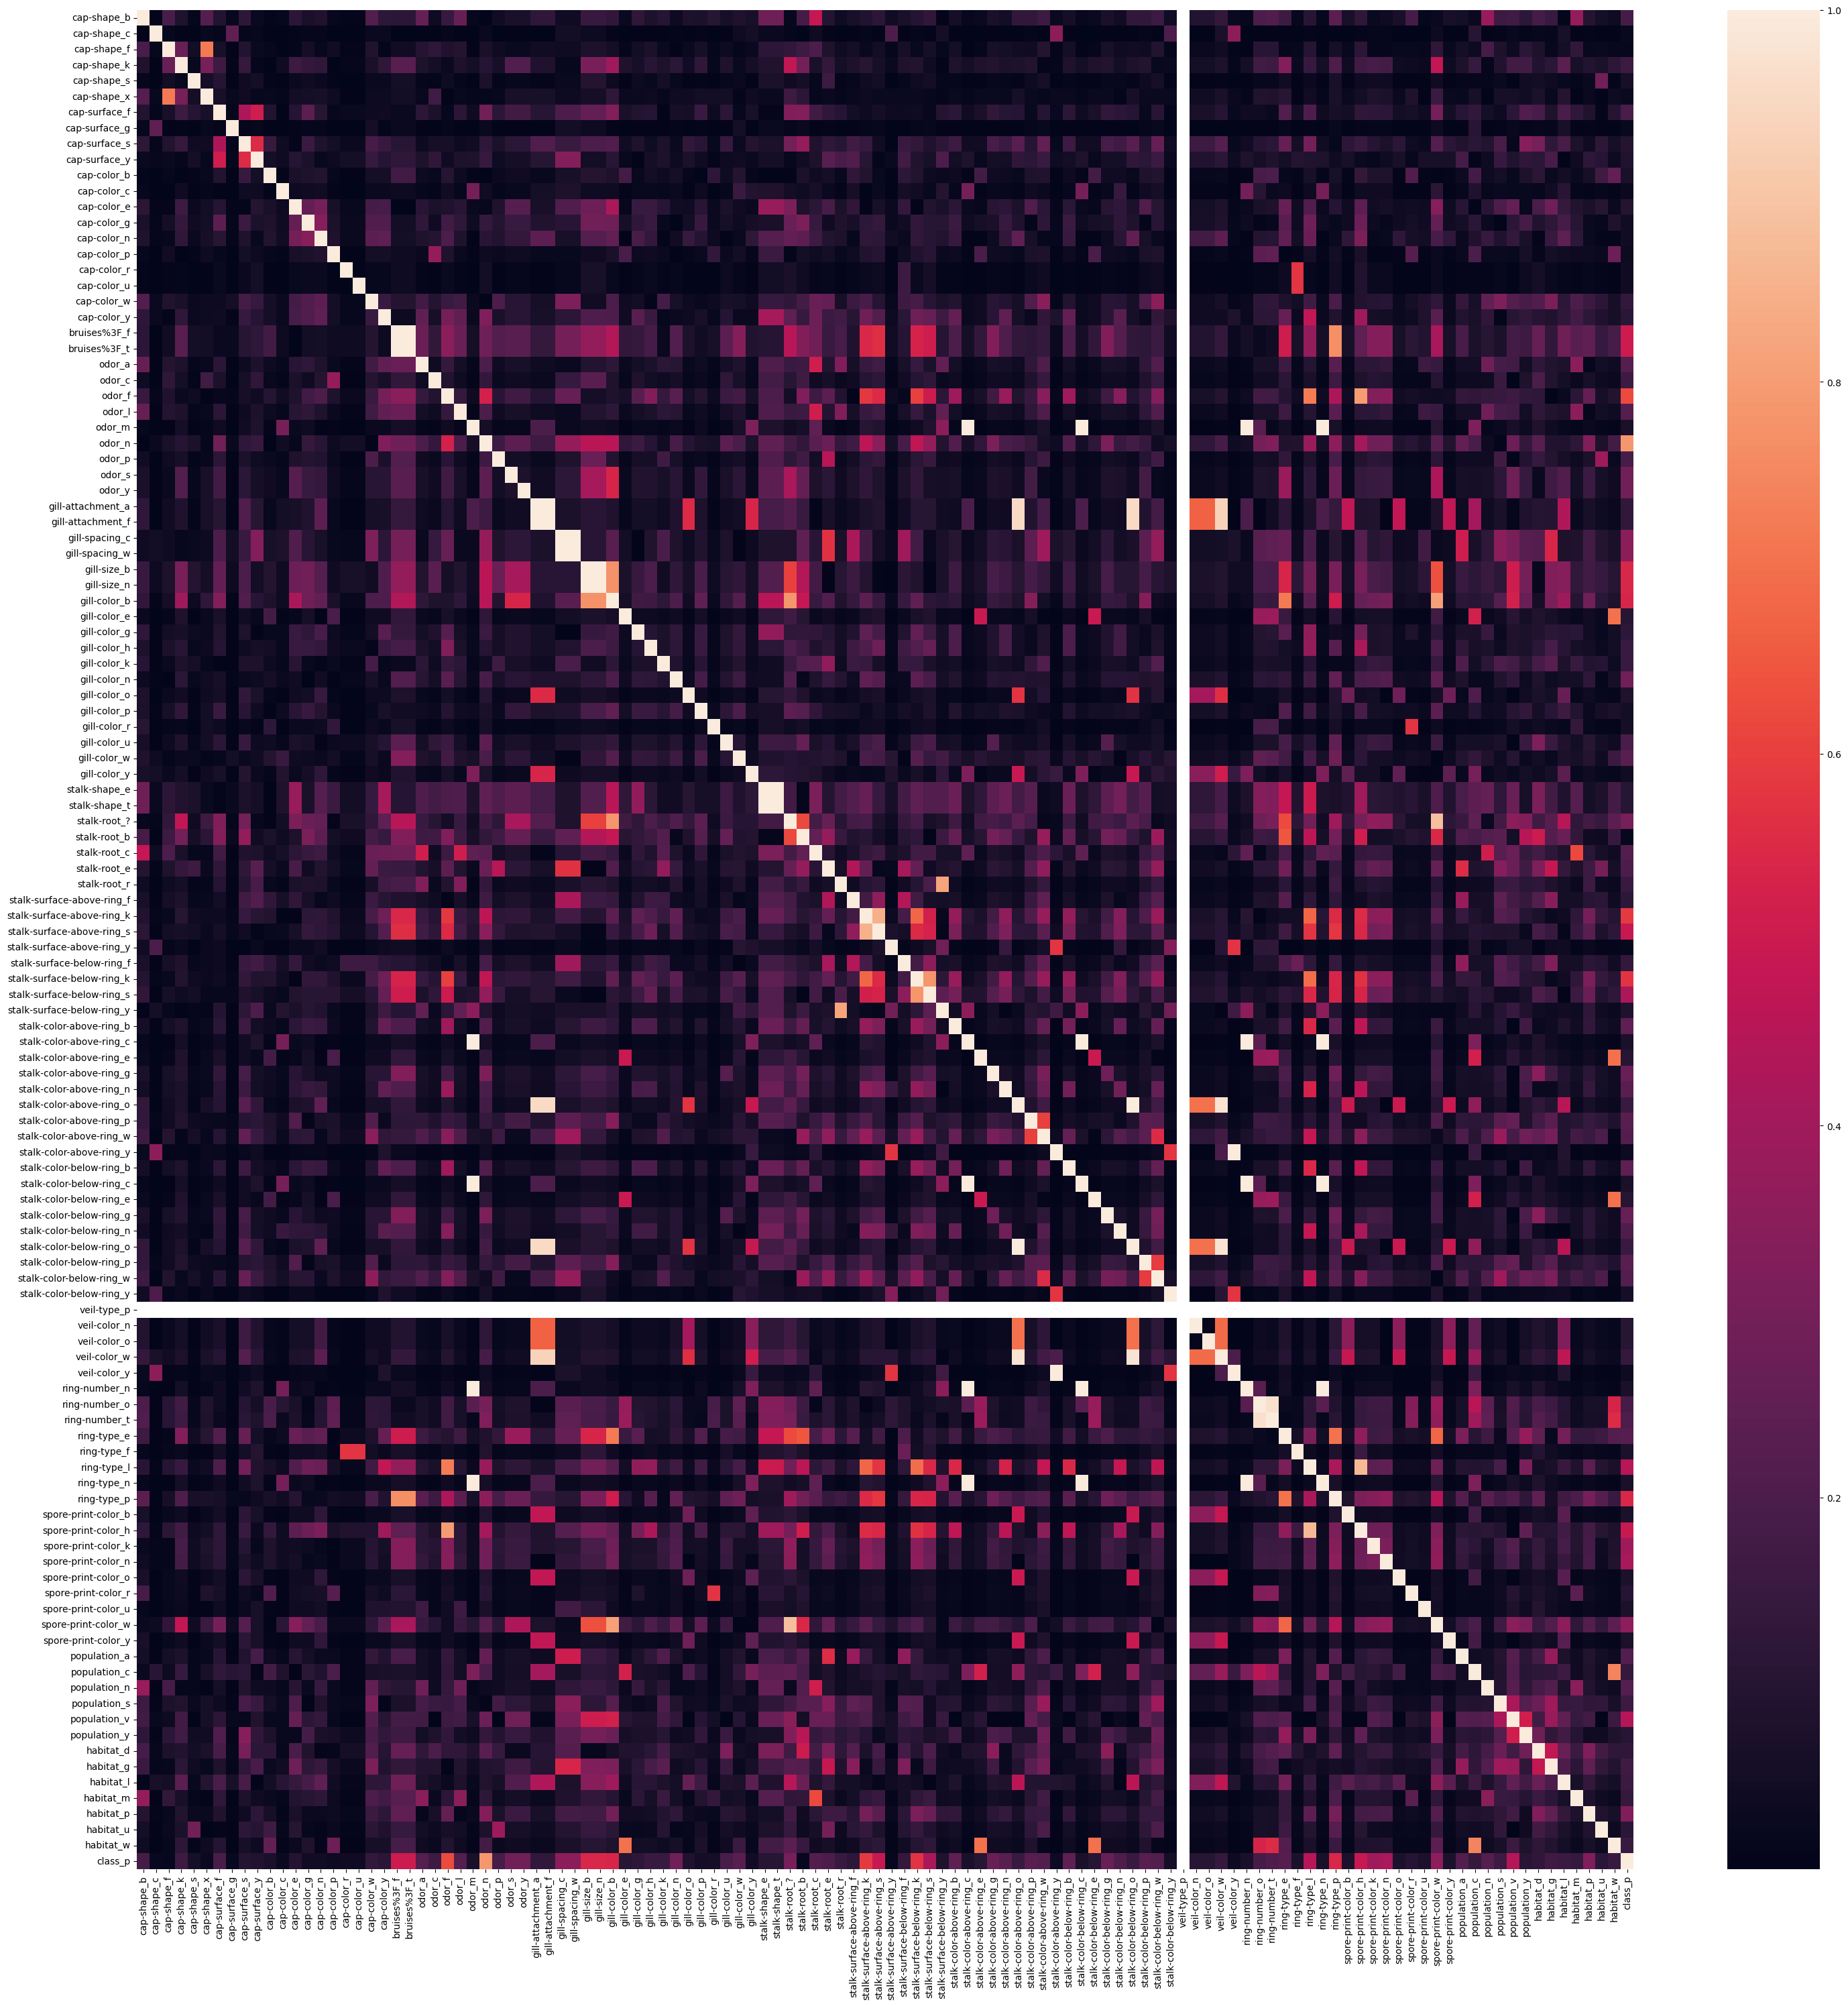

In [9]:
corr_matrix = df_ohe.corr()
fig, ax = plt.subplots(figsize = (36,36))
sns.heatmap(abs(corr_matrix))
pd.set_option('display.max_rows', None)
corr_matrix


In [10]:
high_c = corr_matrix[abs(corr_matrix['class_p']) > 0.5]['class_p']
print(high_c)

bruises%3F_f                  0.501530
bruises%3F_t                 -0.501530
odor_f                        0.623842
odor_n                       -0.785557
gill-size_b                  -0.540024
gill-size_n                   0.540024
gill-color_b                  0.538808
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                  -0.540469
class_p                       1.000000
Name: class_p, dtype: float64


In [11]:
X = df_ohe
y = df_ohe.pop("class_p")

## Logisitc Regression 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [13]:
train_acc =model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Testing accuracy: 0.9993846153846154


In [14]:
###manually making confusion table from a different threshold
def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

In [15]:
from sklearn.metrics import confusion_matrix
threshold = 0.5
print(confusion_matrix(y_test,t_repredict(model, threshold, X_test)))
print(confusion_matrix(y_train,t_repredict(model, threshold, X_train)))

[[846   0]
 [  1 778]]
[[3362    0]
 [   0 3137]]


In [16]:
#making ROC curves for this model
from sklearn.metrics import roc_curve, auc

#name: name of your model to appear on the figure (can be arbitrary)
#clf: the model as you named it - will be used for getting the predictions
#ytest, xtest: your test data
#skip, labe: steps that control how many points you see in the ROC curve and how many labels are there

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM? (but double-check this pleaseee)
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    
    #this is the single value for the AUC score
    roc_auc = auc(fpr, tpr)
    
    if skip: 
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    
    #add labels to the curve
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

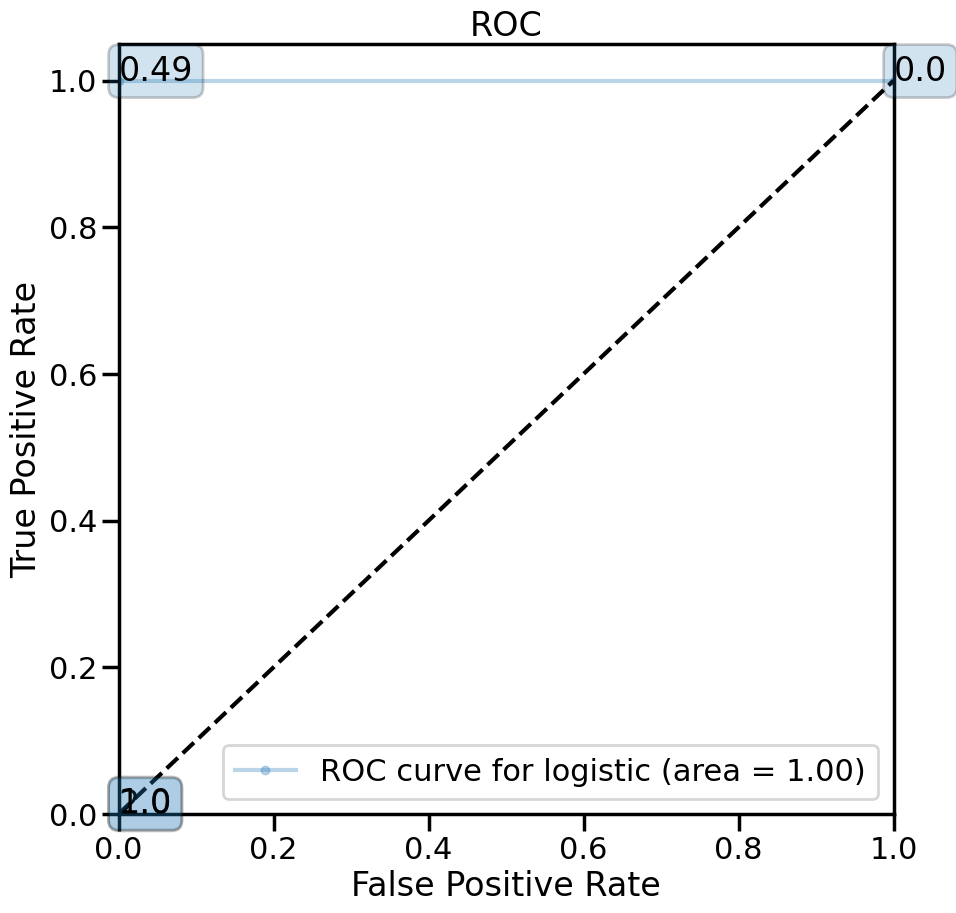

In [17]:
#This is how the above function should be used

sns.set_context("poster")
fig, ax = plt.subplots(figsize = (10,10))
ax=make_roc("logistic",model, y_test, X_test, labe=1,  skip=0)
plt.show()

# Random Forest 


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

RFmodel = RandomForestClassifier()

param_grid = {
    'n_estimators': [5, 10, 25],
    'max_depth': [None, 1, 5],
    'min_samples_split': [1, 2, 5]
}

grid_search = GridSearchCV(RFmodel, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 5}
Best score:  0.937591663508905


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", li

In [19]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 5}

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RFmodel = RandomForestClassifier(**grid_search.best_params_)


RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [22]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       843
           1       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [23]:
import time
start_time = time.time()
importances = RFmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFmodel.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.002 seconds


Text(0, 0.5, 'Mean decrease in impurity')

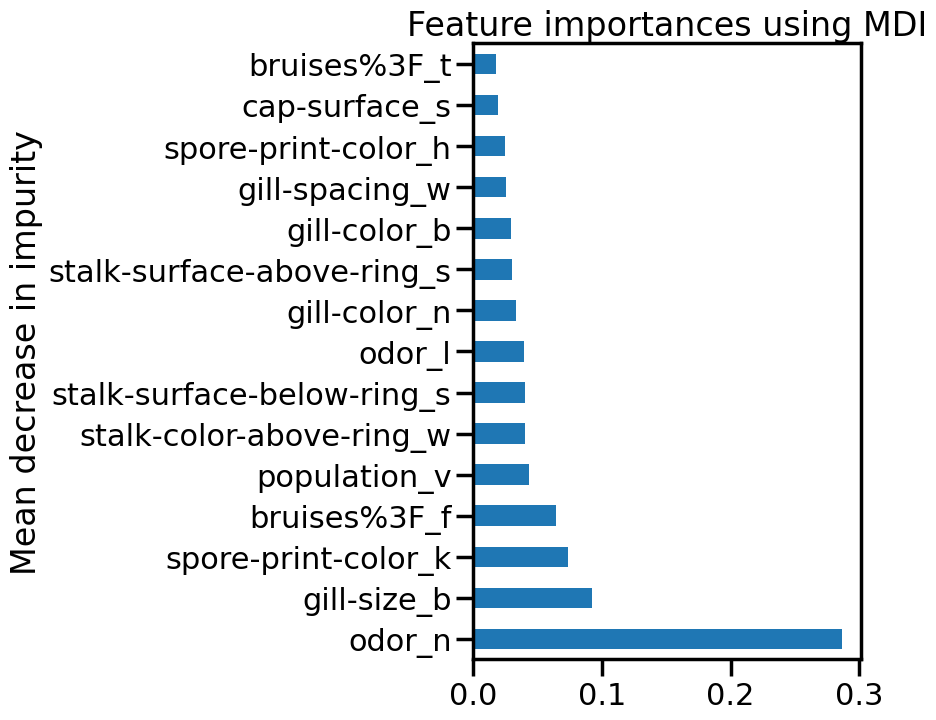

In [24]:
feature_names = [name for name in X.columns]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (5,8))
forest_importances.head(15).plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


In [25]:
feature_df = forest_importances.reset_index()
feature_df[['category', 'observation']] = feature_df['index'].str.split('_', n=1, expand=True)
feature_df = feature_df[['category', 'observation', 0]]
feature_df.columns = ['category', 'observation', 'value']


Text(0, 0.5, 'Mean decrease in impurity')

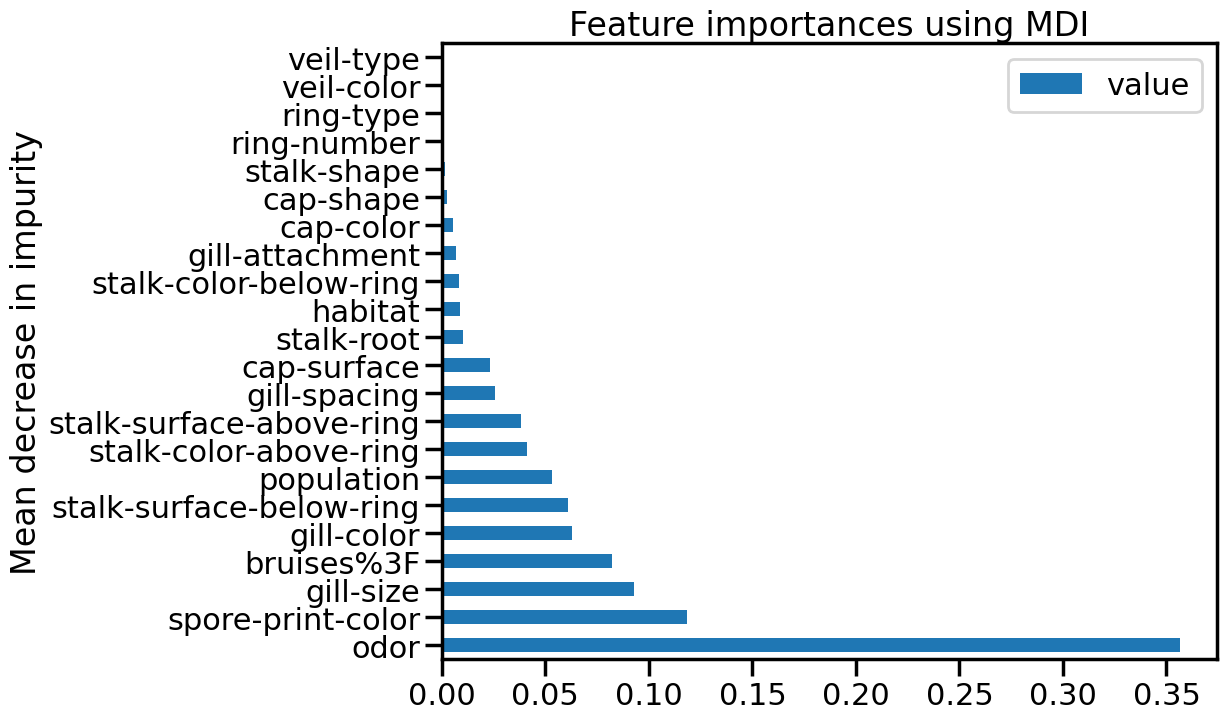

In [26]:
sorted_df = feature_df.groupby('category')['value'].sum().reset_index().sort_values('value', ascending=False)
sroted_df = sorted_df.set_index('category')
fig, ax = plt.subplots(figsize = (10,8))
sorted_df.plot.barh(x= 'category', y = 'value', ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


In [27]:
sorted_df.set_index('category')

,value
category,
odor,0.356516
spore-print-color,0.118398
gill-size,0.092674
bruises%3F,0.082276
gill-color,0.063073
stalk-surface-below-ring,0.060965
population,0.053389
stalk-color-above-ring,0.040990
stalk-surface-above-ring,0.038217


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

n = 5
knn_model = KNeighborsClassifier(n_neighbors=n)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
train_acc = knn_model.score(X_train, y_train)
test_acc = knn_model.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Testing accuracy: 1.0


# Reduced logisitic regression


In [30]:
df_ohe = ohe(df, df.columns, df_dict)
X = df_ohe.loc[:,"odor_a":"odor_y"]
y = df_ohe["class_p"]

In [31]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1)

model = LogisticRegression(C=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [32]:
train_acc =model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 0.9848173984407058
Testing accuracy: 0.988929889298893
